Project by : Ionas Andreea and Mihu Octavian

In [1]:
import pandas as pd
# Load test.csv
test_data = pd.read_csv('test.csv')

# Load train.csv
train_data = pd.read_csv('train.csv')

Data overview

In [2]:
print("Test Data Description:")
print(test_data.describe())

Test Data Description:
          patient_id  patient_zip3  patient_age          bmi    population  \
count    5646.000000   5646.000000  5646.000000  1705.000000   5646.000000   
mean   549581.847680    569.824655    58.921537    29.142798  20865.277040   
std    260549.557126    276.824893    13.326813     5.612167  14252.666477   
min    100401.000000    100.000000    18.000000    16.000000    829.520000   
25%    325189.750000    330.000000    50.000000    24.840000   8893.480000   
50%    551142.500000    554.000000    59.000000    28.340000  19154.190000   
75%    773004.000000    836.000000    66.000000    33.140000  30145.890000   
max    999846.000000    997.000000    91.000000    43.700000  71374.130000   

            density   age_median  age_under_10  age_10_to_19      age_20s  \
count   5646.000000  5646.000000   5646.000000   5646.000000  5646.000000   
mean    1826.421314    40.509499     11.123819     12.868130    13.291959   
std     3928.358993     3.983375      1.498

In [3]:
print("Train Data Description:")
print(train_data.describe())

Train Data Description:
          patient_id  patient_zip3   patient_age          bmi    population  \
count   13173.000000  13173.000000  13173.000000  4102.000000  13173.000000   
mean   555441.784939    568.530859     59.271313    29.168808  20651.373928   
std    259476.503094    275.758485     13.218883     5.752820  13840.379638   
min    100043.000000    100.000000     18.000000    15.000000    635.550000   
25%    335100.000000    330.000000     50.000000    24.825000   9160.340000   
50%    555769.000000    557.000000     59.000000    28.580000  18952.780000   
75%    780967.000000    832.000000     67.000000    33.000000  30021.280000   
max    999982.000000    995.000000     91.000000    97.000000  71374.130000   

            density    age_median  age_under_10  age_10_to_19       age_20s  \
count  13173.000000  13173.000000  13173.000000  13173.000000  13173.000000   
mean    1776.872376     40.542676     11.104988     12.857587     13.297375   
std     3876.061897      4.

In [4]:
print("Test Data Info:")
test_data.info()

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5646 entries, 0 to 5645
Columns: 151 entries, patient_id to Average of Dec-18
dtypes: float64(137), int64(3), object(11)
memory usage: 6.5+ MB


In [5]:
print("Train Data Info:")
train_data.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13173 entries, 0 to 13172
Columns: 152 entries, patient_id to metastatic_diagnosis_period
dtypes: float64(137), int64(4), object(11)
memory usage: 15.3+ MB


See the number of rows and columns.
This information is useful for understanding the size and structure of the dataset, 
which can be crucial for data preprocessing, analysis, and modeling.

In [6]:
train_data.shape

(13173, 152)

In [7]:
test_data.shape

(5646, 151)

In [8]:
race_counts_test = test_data['patient_race'].value_counts()
(race_counts_test)

patient_race
White       1564
Black        474
Hispanic     355
Other        305
Asian        163
Name: count, dtype: int64

In [9]:
race_counts_train = train_data['patient_race'].value_counts()
(race_counts_train)

patient_race
White       3565
Black       1159
Hispanic     807
Other        612
Asian        373
Name: count, dtype: int64

We analyze the data in the table and we can see that a large percentage of data is missing from some columns, so we can drop those data.
We could drop:
* bmi (~ 68% missing).
* metastatic_first_novel_treatment (~ 99% data missing).
* metastatic_first_novel_treatment_type (~ 99% data missing).

Also, some columns do not contain relevant information or contain information that will not help us in the prediction:
* patient_gender (100% woman)
* breast_cancer_diagnosis_desc (no relevant info for prediction)
* patient_id (uniqe for every patient)

In [10]:
from prettytable import PrettyTable
table = PrettyTable()
target='metastatic_diagnosis_period'
table.field_names = ['Column Name', 'Data Type', 'Train Missing %', 'Test Missing %']
for column in train_data.columns:
    data_type = str(train_data[column].dtype)
    non_null_count_train= 100-train_data[column].count()/train_data.shape[0]*100
    if column!=target:
        non_null_count_test = 100-test_data[column].count()/test_data.shape[0]*100
    else:
        non_null_count_test="NA"
    table.add_row([column, data_type, non_null_count_train,non_null_count_test])
print(table)

+---------------------------------------+-----------+----------------------+----------------------+
|              Column Name              | Data Type |   Train Missing %    |    Test Missing %    |
+---------------------------------------+-----------+----------------------+----------------------+
|               patient_id              |   int64   |         0.0          |         0.0          |
|              patient_race             |   object  |  50.53518560692325   |  49.32695713779667   |
|               payer_type              |   object  |  13.398618386092764  |  13.90364860077932   |
|             patient_state             |   object  |         0.0          |         0.0          |
|              patient_zip3             |   int64   |         0.0          |         0.0          |
|                 Region                |   object  |         0.0          |         0.0          |
|                Division               |   object  |         0.0          |         0.0          |


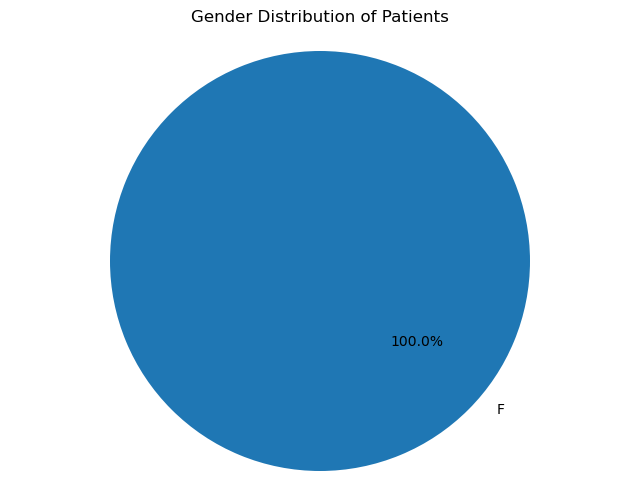

In [11]:
import matplotlib.pyplot as plt
gender_counts = train_data['patient_gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Patients')
plt.axis('equal')  
plt.show()

We analyze other relevant data to help us with the prediction

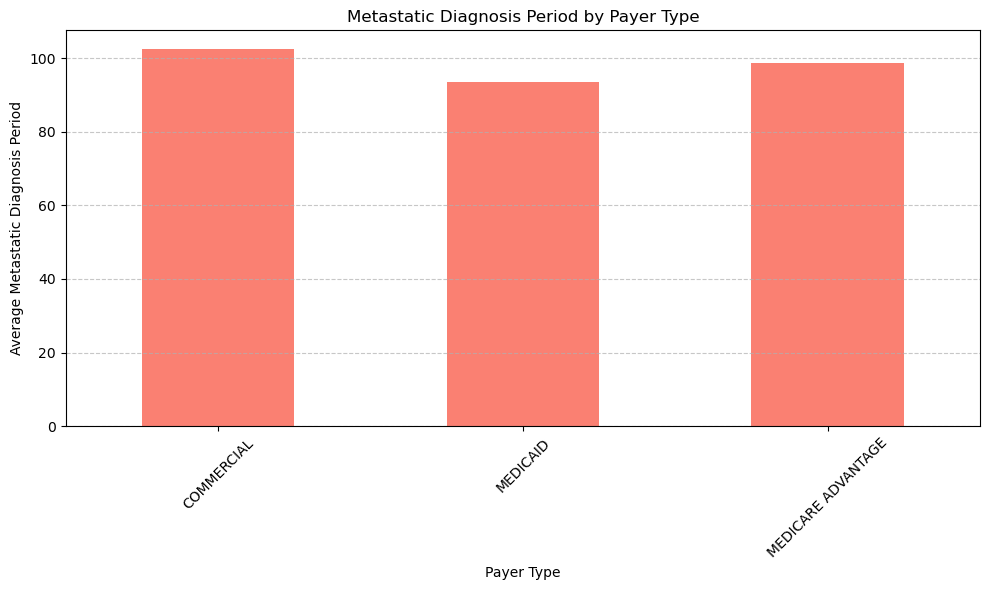

In [12]:
avg_period_by_payer = train_data.groupby('payer_type')['metastatic_diagnosis_period'].mean()
plt.figure(figsize=(10, 6))
avg_period_by_payer.plot(kind='bar', color='salmon')
plt.title('Metastatic Diagnosis Period by Payer Type')
plt.xlabel('Payer Type')
plt.ylabel('Average Metastatic Diagnosis Period')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

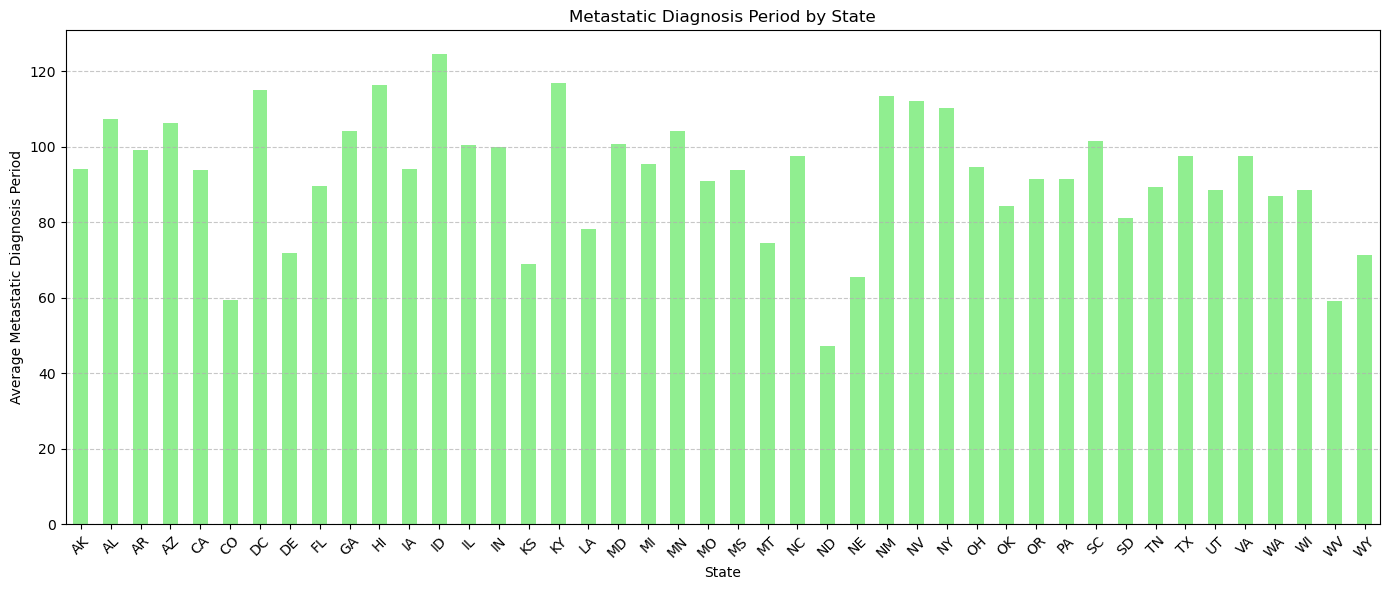

In [13]:
avg_period_by_state = train_data.groupby('patient_state')['metastatic_diagnosis_period'].mean()
plt.figure(figsize=(14, 6))
avg_period_by_state.plot(kind='bar', color='lightgreen')
plt.title('Metastatic Diagnosis Period by State')
plt.xlabel('State')
plt.ylabel('Average Metastatic Diagnosis Period')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

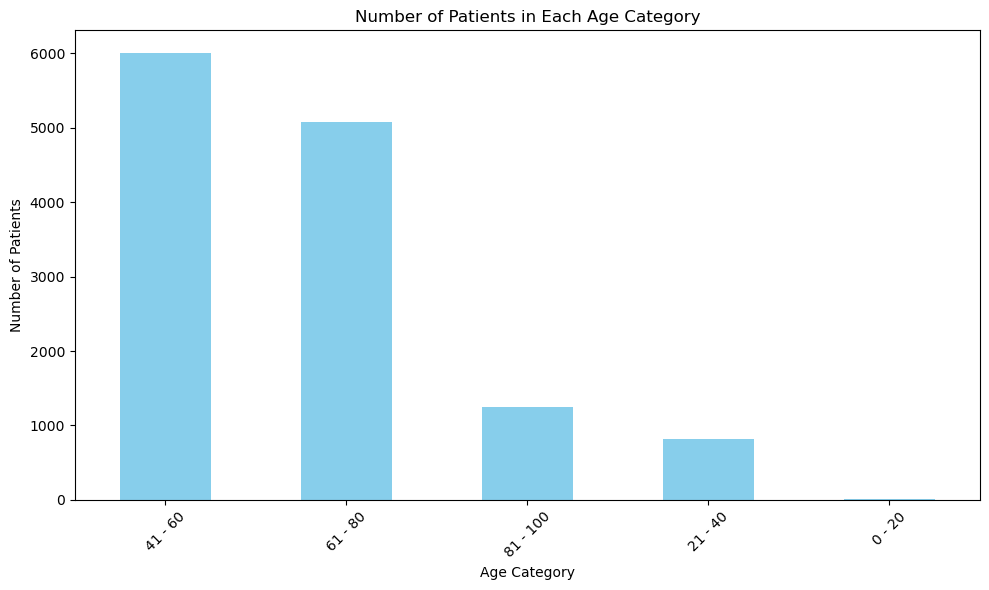

In [14]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0 - 20', '21 - 40', '41 - 60', '61 - 80', '81 - 100']
age_category_counts = pd.cut(train_data['patient_age'], bins=bins, labels=labels, right=False).value_counts()
age_category_counts.plot.bar(figsize=(10, 6), color='skyblue')
plt.title('Number of Patients in Each Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


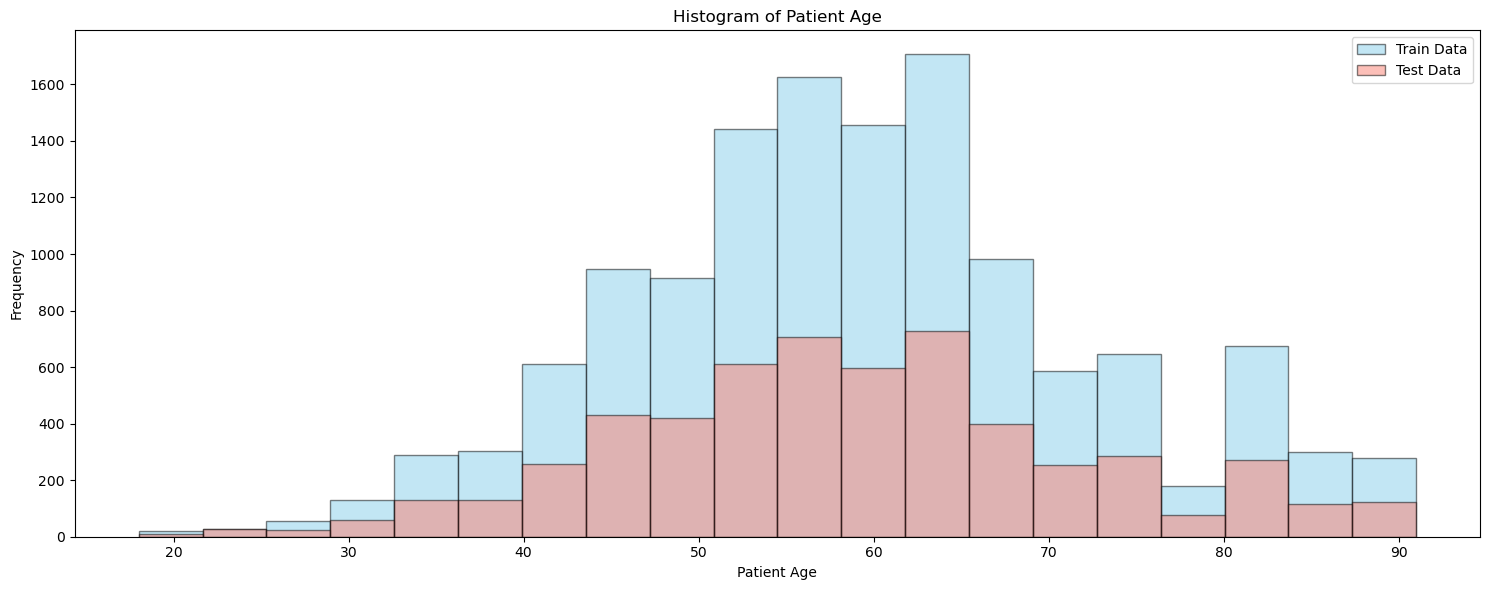

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(train_data['patient_age'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Train Data')
ax.hist(test_data['patient_age'], bins=20, color='salmon', edgecolor='black', alpha=0.5, label='Test Data')

ax.set_xlabel('Patient Age')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Patient Age')
ax.legend()

plt.tight_layout()
plt.show()

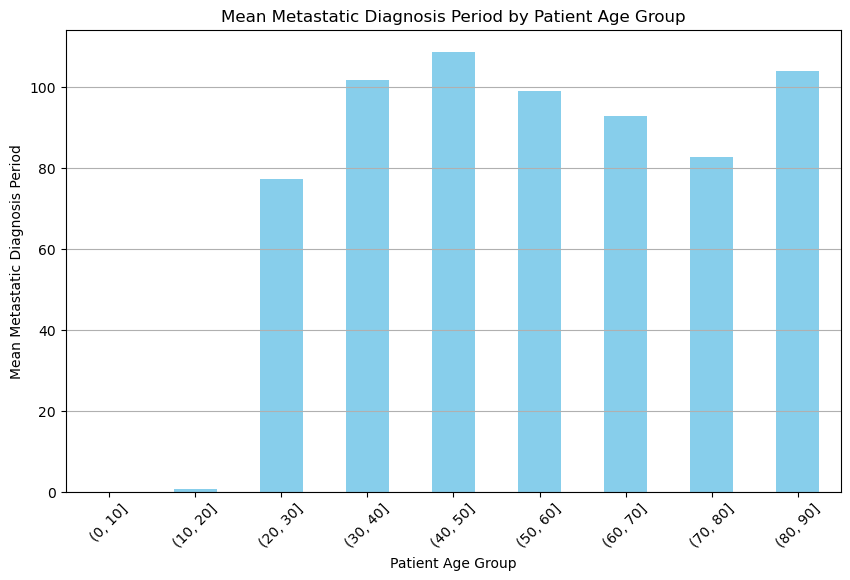

In [16]:
import numpy as np
import matplotlib.pyplot as plt
metastatic_diagnosis_period = train_data['metastatic_diagnosis_period']
patient_age = train_data['patient_age']
bins = np.arange(0, 100, 10) 

age_groups = pd.cut(patient_age, bins=bins)
mean_metastatic_period = metastatic_diagnosis_period.groupby(age_groups, observed=False).mean()

plt.figure(figsize=(10, 6))
mean_metastatic_period.plot(kind='bar', color='skyblue')
plt.title('Mean Metastatic Diagnosis Period by Patient Age Group')
plt.xlabel('Patient Age Group')
plt.ylabel('Mean Metastatic Diagnosis Period')
plt.xticks(rotation=45)  
plt.grid(axis='y') 
plt.show()


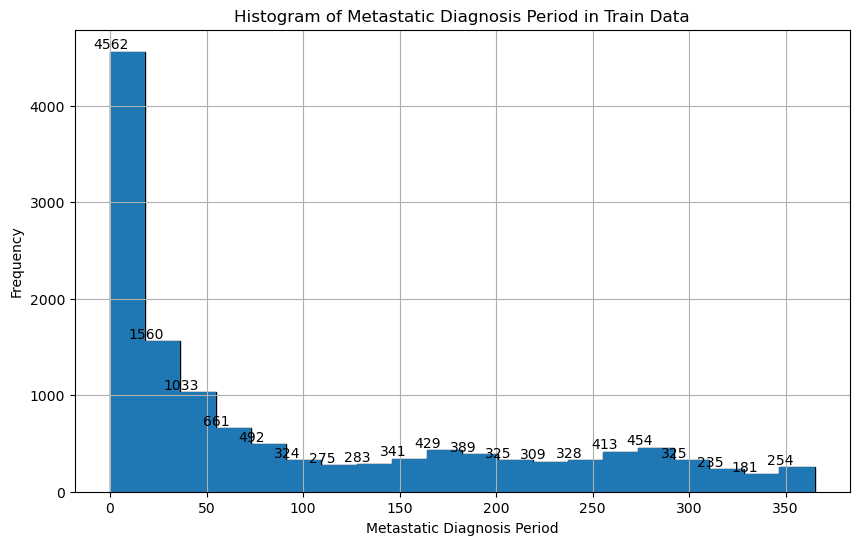

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['metastatic_diagnosis_period'], bins=20, color='skyblue', edgecolor='black')
counts, bins, _ = plt.hist(train_data['metastatic_diagnosis_period'], bins=20)
for count, x in zip(counts, bins):
    if count != 0:
        plt.text(x + 0.5, count + 0.5, str(int(count)), ha='center', va='bottom')
plt.xlabel('Metastatic Diagnosis Period')
plt.ylabel('Frequency')
plt.title('Histogram of Metastatic Diagnosis Period in Train Data')
plt.grid(True)
plt.show()


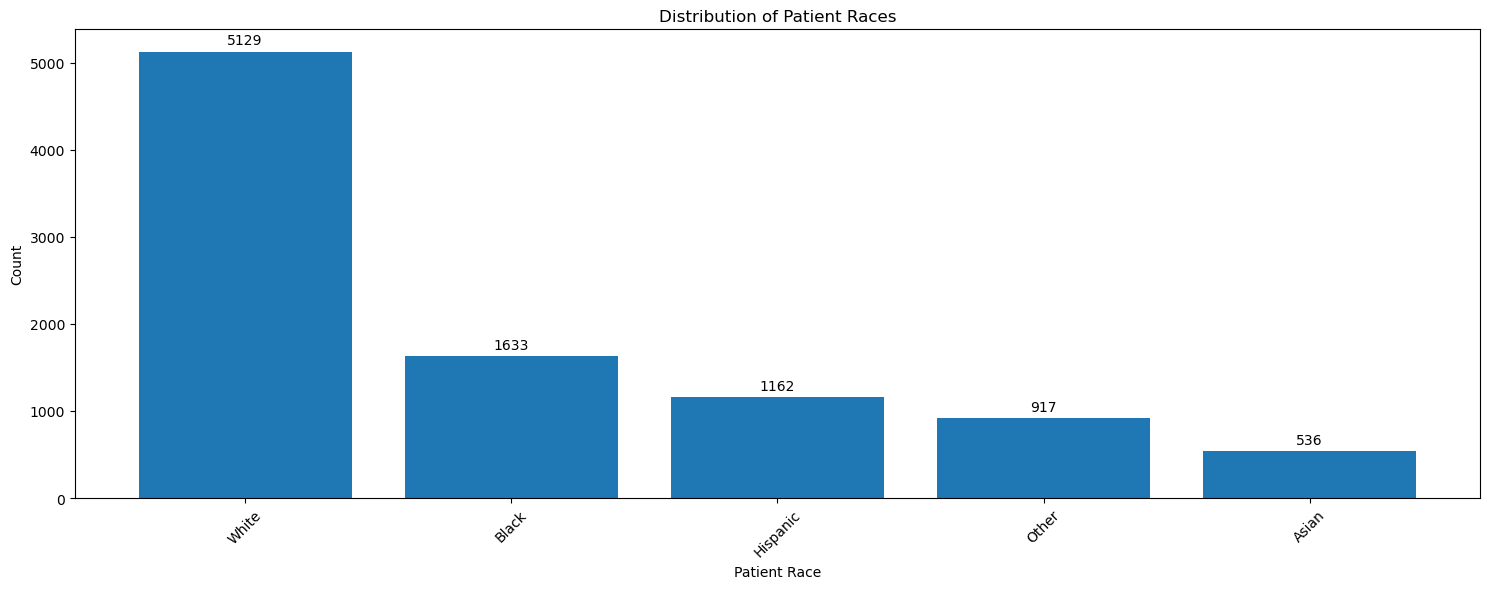

In [18]:
combined_race_counts = pd.concat([train_data['patient_race'], test_data['patient_race']]).value_counts()
plt.figure(figsize=(15, 6))
bars = plt.bar(combined_race_counts.index, combined_race_counts.values)
plt.xlabel('Patient Race')
plt.ylabel('Count')
plt.title('Distribution of Patient Races')
plt.xticks(rotation=45)
for bar, count in zip(bars, combined_race_counts):
    plt.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.tight_layout() 
plt.show()

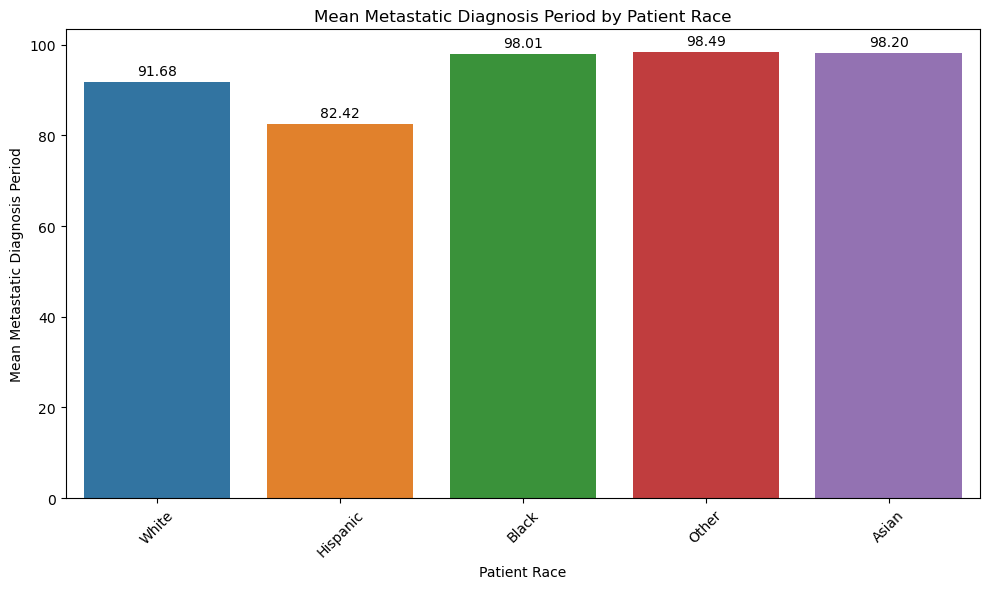

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=train_data, x='patient_race', y='metastatic_diagnosis_period',  errorbar=None) 
plt.xlabel('Patient Race')
plt.ylabel('Mean Metastatic Diagnosis Period')
plt.title('Mean Metastatic Diagnosis Period by Patient Race')
plt.xticks(rotation=45)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='center',
                 size=10, xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()  
plt.show()


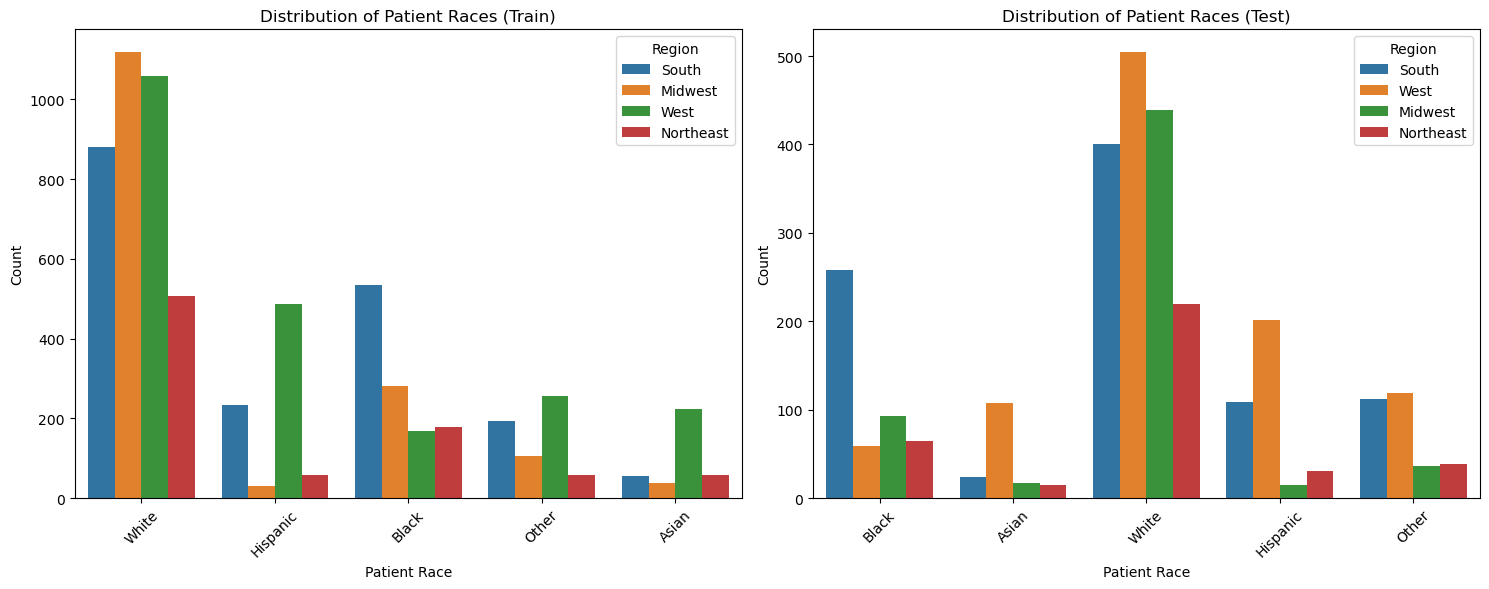

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
train_race_counts = train_data['patient_race'].value_counts()
test_race_counts = test_data['patient_race'].value_counts()

sns.countplot(data=train_data, x='patient_race', hue='Region', ax=axes[0])
axes[0].set_xlabel('Patient Race')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Patient Races (Train)')
axes[0].tick_params(axis='x', rotation=45) 


sns.countplot(data=test_data, x='patient_race', hue='Region', ax=axes[1])
axes[1].set_xlabel('Patient Race')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Patient Races (Test)')
axes[1].tick_params(axis='x', rotation=45)  

plt.tight_layout() 
plt.show()

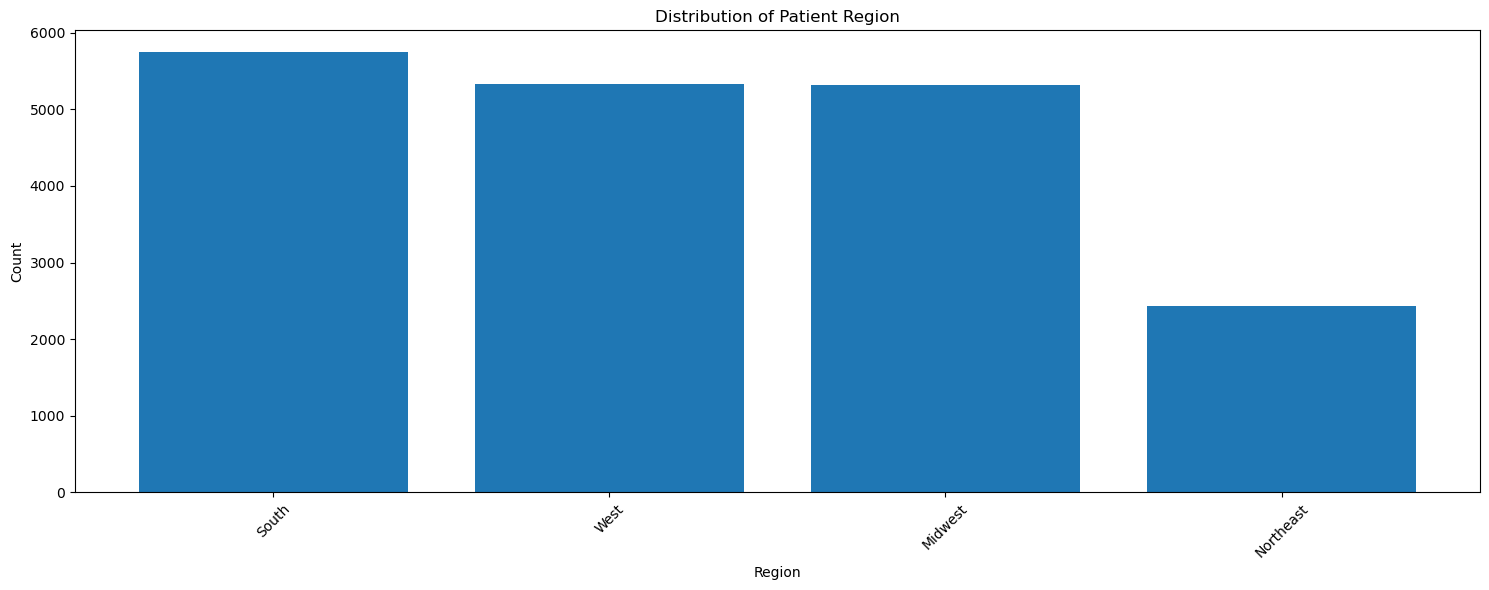

In [21]:
combined_region_counts = pd.concat([train_data['Region'], test_data['Region']]).value_counts()
plt.figure(figsize=(15, 6))
plt.bar(combined_region_counts.index, combined_region_counts.values)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Patient Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


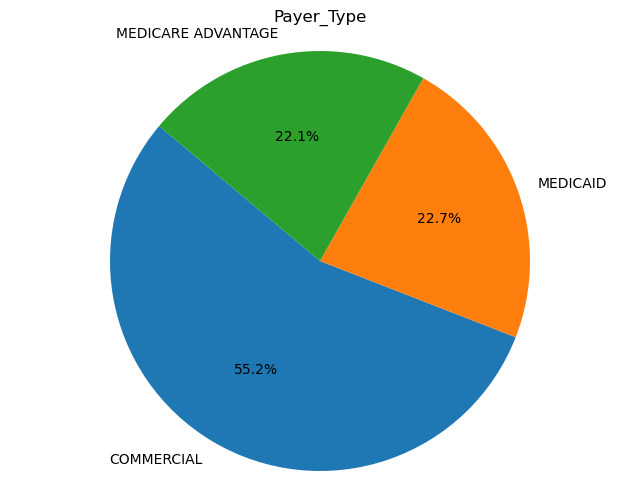

In [22]:
payer_type_counts = train_data['payer_type'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
plt.pie(payer_type_counts, labels=payer_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payer_Type')
plt.axis('equal')  
plt.show()


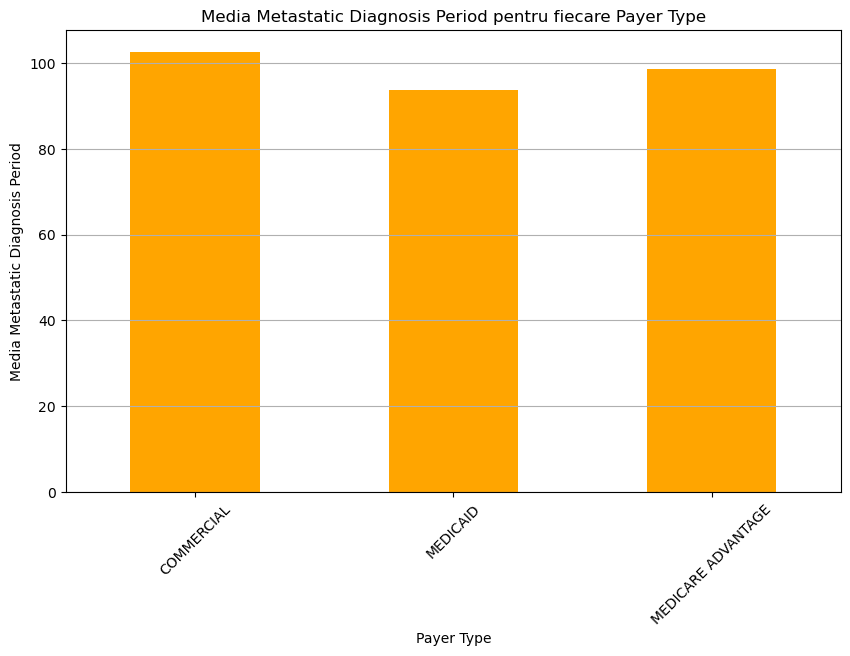

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_metastatic_period = train_data.groupby('payer_type')['metastatic_diagnosis_period'].mean()

plt.figure(figsize=(10, 6))
mean_metastatic_period.plot(kind='bar', color='orange')
plt.title('Media Metastatic Diagnosis Period pentru fiecare Payer Type')
plt.xlabel('Payer Type')
plt.ylabel('Media Metastatic Diagnosis Period')
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.show()


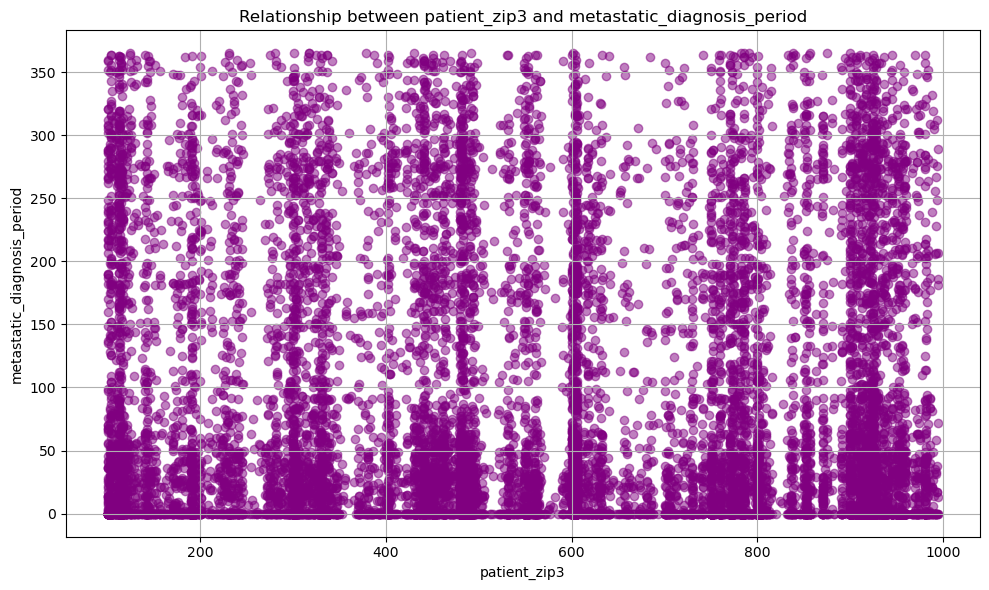

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['patient_zip3'], train_data['metastatic_diagnosis_period'], color='purple', alpha=0.5)
plt.title('Relationship between patient_zip3 and metastatic_diagnosis_period')
plt.xlabel('patient_zip3')
plt.ylabel('metastatic_diagnosis_period')
plt.grid(True)
plt.tight_layout()
plt.show()


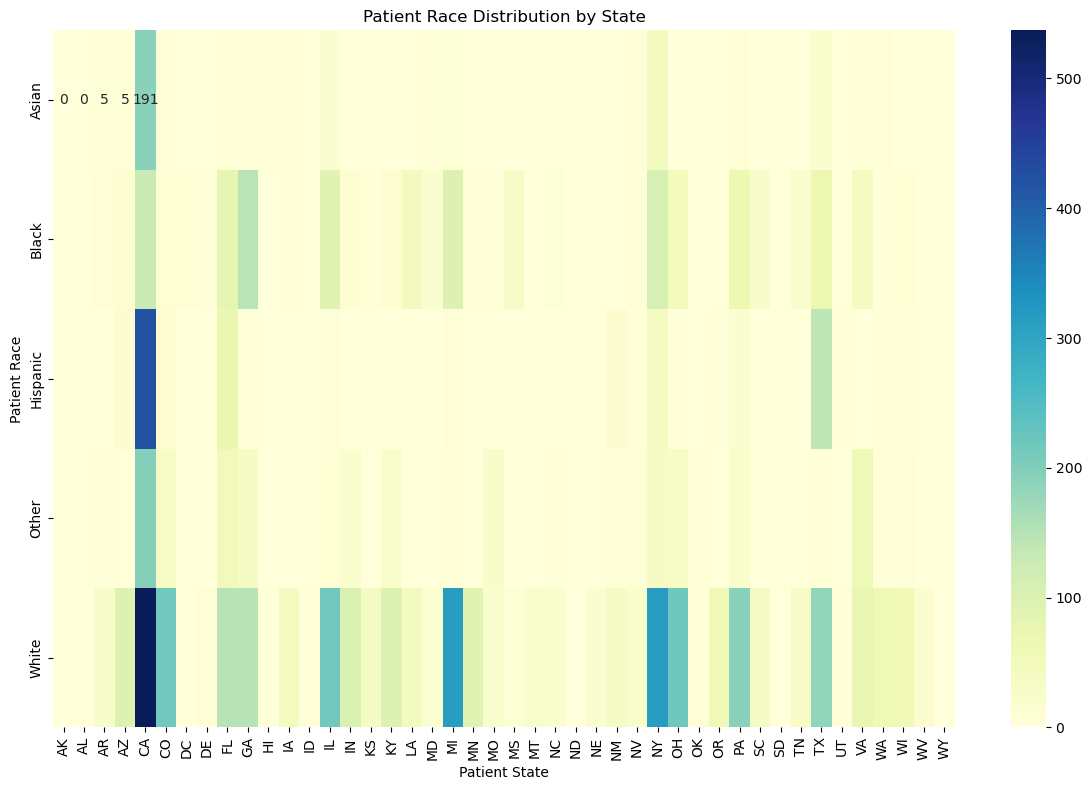

In [25]:
import seaborn as sns
race_state_cross = pd.crosstab(train_data['patient_race'], train_data['patient_state'])

plt.figure(figsize=(12, 8))
sns.heatmap(race_state_cross, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Patient Race Distribution by State')
plt.xlabel('Patient State')
plt.ylabel('Patient Race')
plt.tight_layout()
plt.show()


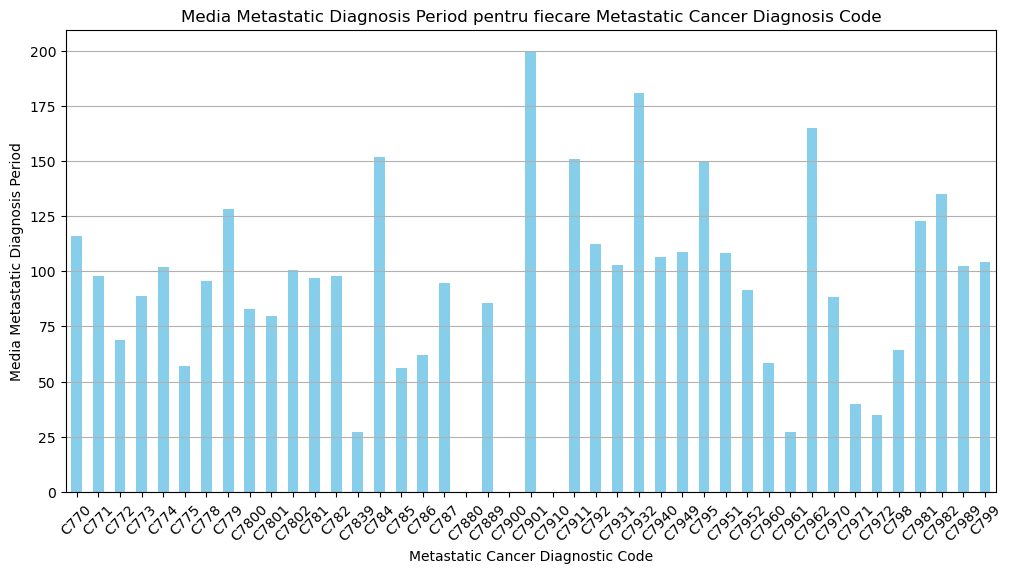

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_metastatic_period = train_data.groupby('metastatic_cancer_diagnosis_code')['metastatic_diagnosis_period'].mean()


plt.figure(figsize=(12, 6))
mean_metastatic_period.plot(kind='bar', color='skyblue')
plt.title('Media Metastatic Diagnosis Period pentru fiecare Metastatic Cancer Diagnosis Code')
plt.xlabel('Metastatic Cancer Diagnostic Code')
plt.ylabel('Media Metastatic Diagnosis Period')
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.show()


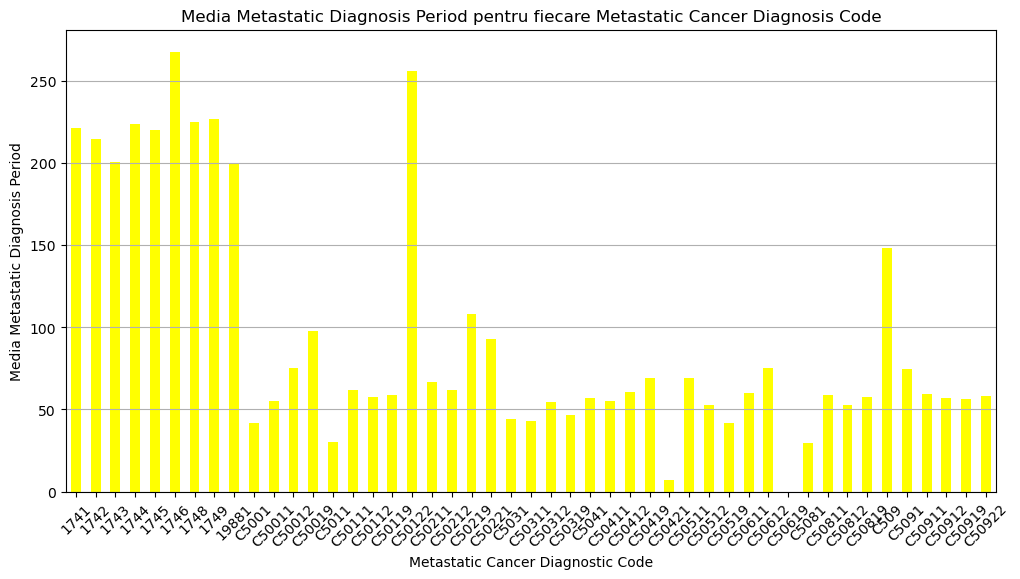

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_metastatic_period = train_data.groupby('breast_cancer_diagnosis_code')['metastatic_diagnosis_period'].mean()

plt.figure(figsize=(12, 6))
mean_metastatic_period.plot(kind='bar', color='yellow')
plt.title('Media Metastatic Diagnosis Period pentru fiecare Metastatic Cancer Diagnosis Code')
plt.xlabel('Metastatic Cancer Diagnostic Code')
plt.ylabel('Media Metastatic Diagnosis Period')
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.show()


In [28]:
avg_cols = train_data.columns[train_data.columns.str.startswith('Average')].tolist()
df_avg = train_data[['patient_zip3', 'patient_state'] + avg_cols].drop_duplicates().sort_values(by='patient_zip3').reset_index(drop=True)
print(df_avg.shape)
df_avg.head()

(753, 74)


,patient_zip3,patient_state,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,100,NY,33.44,30.84,38.45,51.26,60.18,71.91,78.55,71.32,...,37.87,47.55,65.06,70.23,77.12,77.72,69.82,55.79,42.04,37.18
1,101,NY,33.51,30.81,38.44,51.27,60.14,71.98,78.64,71.34,...,37.95,47.68,65.17,70.33,77.22,77.83,69.93,55.92,42.16,37.26
2,103,NY,34.01,31.87,38.52,51.63,60.29,71.92,78.43,71.46,...,38.14,47.99,65.17,70.81,76.90,77.75,69.90,56.45,42.55,37.49
3,104,NY,32.81,31.04,38.55,51.15,60.48,71.39,77.86,71.19,...,37.22,46.54,64.18,69.41,76.37,76.81,68.91,54.75,41.06,36.54
4,105,NY,29.13,27.78,34.54,48.12,58.59,67.86,75.06,68.19,...,34.47,43.69,62.71,66.81,73.70,73.99,66.41,52.29,38.51,33.56


Replace missing values with the mean

In [29]:
import numpy as np

# Replace missing values
def mixed_imputation(train_data, group_col):
    train_data_copy = train_data.copy()
    for column in train_data_copy.columns:
        if column != group_col:
            # If the column is numerical, then mean imputation
            if train_data_copy[column].dtype in [np.dtype('float_'), np.dtype('int_')]:  
                mean_impute = train_data_copy.groupby(group_col)[column].mean()
                train_data_copy.loc[:, column] = train_data_copy[column].fillna(train_data_copy[group_col].map(mean_impute))
            
            # If the column is categorical, apply mode imputation
            else :  
                mode_impute = train_data_copy.groupby(group_col)[column].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
                train_data_copy.loc[:, column] = train_data_copy[column].fillna(train_data_copy[group_col].map(mode_impute))
            
    return train_data_copy
# Impute payer_type - most frequent value at zip, then at state
train_data['payer_type'] = mixed_imputation(
    mixed_imputation(train_data[['patient_zip3', 'patient_state', 'payer_type']], group_col='patient_zip3'), 
    group_col='patient_state')['payer_type'].values

# Impute race - most frequent value at zip, then at state
train_data['patient_race'] = mixed_imputation(
    mixed_imputation(train_data[['patient_zip3', 'patient_state', 'patient_race']], group_col='patient_zip3'), 
    group_col='patient_state')['patient_race'].values


In [30]:
from prettytable import PrettyTable
table = PrettyTable()
target='metastatic_diagnosis_period'
table.field_names = ['Column Name', 'Data Type', 'Train Missing %', 'Test Missing %']
for column in train_data.columns:
    data_type = str(train_data[column].dtype)
    non_null_count_train= 100-train_data[column].count()/train_data.shape[0]*100
    if column!=target:
        non_null_count_test = 100-test_data[column].count()/test_data.shape[0]*100
    else:
        non_null_count_test="NA"
    table.add_row([column, data_type, non_null_count_train,non_null_count_test])
print(table)

+---------------------------------------+-----------+----------------------+----------------------+
|              Column Name              | Data Type |   Train Missing %    |    Test Missing %    |
+---------------------------------------+-----------+----------------------+----------------------+
|               patient_id              |   int64   |         0.0          |         0.0          |
|              patient_race             |   object  |         0.0          |  49.32695713779667   |
|               payer_type              |   object  |         0.0          |  13.90364860077932   |
|             patient_state             |   object  |         0.0          |         0.0          |
|              patient_zip3             |   int64   |         0.0          |         0.0          |
|                 Region                |   object  |         0.0          |         0.0          |
|                Division               |   object  |         0.0          |         0.0          |


Drop the columns that are not relevat to our analysis.

In [31]:
X = train_data.drop(['patient_id', 'bmi', 'breast_cancer_diagnosis_desc','metastatic_first_novel_treatment', 'patient_gender','metastatic_first_novel_treatment_type','metastatic_diagnosis_period'], axis=1)
X = X.iloc[:, :-72]
y = train_data['metastatic_diagnosis_period']

print(X.shape, y.shape)
X.head()

(13173, 73) (13173,)


,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,population,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
0,White,COMMERCIAL,AR,724,South,West South Central,39,C50912,C773,3924.87,...,0.03,0.83,3.94,3.03,22.24,19.27,0.42,25.35,8.06,8.11
1,White,COMMERCIAL,IL,629,Midwest,East North Central,55,C50412,C773,2745.39,...,0.05,0.61,3.42,2.78,20.16,16.94,0.43,26.26,6.93,9.71
2,White,COMMERCIAL,CA,925,West,Pacific,59,1749,C773,38343.18,...,0.38,21.35,11.27,46.88,12.83,12.72,4.58,37.07,8.07,7.75
3,Hispanic,MEDICAID,CA,900,West,Pacific,59,C50911,C773,36054.12,...,0.15,22.14,8.85,45.53,11.90,20.76,14.74,30.71,10.34,3.03
4,White,COMMERCIAL,CA,934,West,Pacific,71,1748,C7951,13700.37,...,0.28,7.25,9.56,34.11,11.96,10.34,5.54,23.48,6.54,8.44


Splits train_data in training (80%) and testing (20%)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

#Se identifica coloanele de tip obiect din dataframe-ul X si se salveaza numele acestora in cols_categorical
cols_categorical = X.columns[X.dtypes == 'object'].to_list()

#Se initializeaza un OrdinalEncoder care va fi folosit pentru a codifica variabilele categorice. 
#Optiunile handle_unknown='use_encoded_value'sși unknown_value=-1 sunt utilizate pentru a trata valorile necunoscute in timpul codificarii.
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1).fit(X[cols_categorical])

#Se codifica variabilele categorice din X folosind encoderul pregatit anterior si se concateneaza 
#rezultatul cu celelalte coloane din dataframe.
X_enc = pd.concat([
    X[X.columns[~X.columns.isin(cols_categorical)]],
    pd.DataFrame(encoder.transform(X[cols_categorical]), columns=cols_categorical)], axis=1)

#Se stabileste o valoare pentru seed si se divizeaza setul de date in seturi de antrenare si testare folosind train_test_split.
seed = 40;
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, random_state=seed, stratify=y, test_size=.2)

print('Training size: ', X_train.shape)
print('Testing size: ', X_test.shape)

X_train.head(4)

Training size:  (10538, 73)
Testing size:  (2635, 73)


,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,commute_time,health_uninsured,veteran,patient_race,payer_type,patient_state,Region,Division,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code
9189,618,90,5012.28,161.78,43.33,10.98,12.57,11.48,11.49,11.38,...,23.49,4.71,7.39,4.0,2.0,13.0,0.0,0.0,39.0,30.0
3274,164,73,3798.67,129.37,44.24,10.36,14.23,10.90,10.34,11.98,...,24.25,6.15,8.62,4.0,2.0,33.0,1.0,2.0,1.0,25.0
10586,300,58,40162.73,875.12,37.73,13.42,14.39,12.03,13.81,14.03,...,32.50,13.04,6.50,1.0,1.0,9.0,2.0,5.0,45.0,3.0
4626,448,42,5890.57,122.39,42.45,12.43,13.19,10.81,10.73,13.04,...,24.48,7.52,8.51,4.0,0.0,30.0,0.0,0.0,27.0,41.0


Random Forest
The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees.
Random Forest is a learning algorithm widely used for both classification and regression tasks. It operates by constructing a multitude of decision trees during training. Each tree is built using a random subset of the training data and a random subset of features. The randomness introduced in the construction process helps to decorrelate the individual trees, reducing overfitting and improving generalization. During prediction, the output of each tree is aggregated to make the final prediction, typically through averaging for regression tasks or voting for classification tasks. 

Import the StandardScaler class from the sklearn.preprocessing module. The StandardScaler is used for standardizing features by removing the mean and scaling to unit variance.
The fit_transform method is applied to the training data X_train. This method computes the mean and standard deviation necessary for scaling and then standardizes the training data.
The transform method is applied to the test data X_test. This method uses the mean and standard deviation computed during the fit step (applied to X_train) to standardize the test data.

In [33]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)    

This code utilizes the SimpleImputer class from the scikit-learn library, which is designed to handle missing values in datasets. An instance of the SimpleImputer class is created with the specified imputation strategy, 'mean', meaning missing values will be replaced with the mean of the respective feature. The fit_transform method is then applied to the training data (X_train), which fits the imputer on the training data and transforms it by replacing missing values with the mean. The resulting imputed training data is stored in the variable 'X_train_imputed'. Similarly, the transform method is applied to the test data (X_test), utilizing the imputer fitted on the training data to replace missing values with the mean. The imputed test data is stored in the variable 'X_test_imputed'. This process ensures that both the training and test datasets have no missing values.

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

This function calculates the Root Mean Squared Error (RMSE), a commonly used metric for evaluating regression models

In [35]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

This code block effectively trains a RandomForestRegressor model on imputed data and evaluates its performance using RMSE, providing insight into the model's predictive accuracy on unseen test data.

With an RMSE value of approximately 82.40, the RandomForestRegressor model demonstrates an average deviation of 82.40 units between its predictions and the actual values in the test dataset. 

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    random_state=seed,
    max_depth=6
).fit(X_train_imputed, y_train)
y_pred = rf.predict(X_test_imputed)
print("RMSE (Random Forest):", rmse(y_test, y_pred))

RMSE (Random Forest): 82.04491552507203


AdaBoost
AdaBoost, short for Adaptive Boosting, is a powerful ensemble learning algorithm used primarily for classification tasks, although it can be adapted for regression as well. The algorithm works by sequentially training a series of weak learners, typically decision trees, each focusing on the instances that were misclassified by the previous learners. During each iteration, AdaBoost assigns higher weights to misclassified instances, allowing subsequent learners to pay more attention to them. The final prediction is made by combining the predictions of all weak learners through a weighted majority vote or weighted sum.

In [37]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(
    random_state=seed,
    learning_rate=.0005
).fit(X_train_imputed, y_train)
print("RMSE (AdaBoost):",rmse(y_test, ada.predict(X_test_imputed)))

RMSE (AdaBoost): 82.33828347976763


Linear Regression
Linear regression is a fundamental and widely used supervised learning algorithm for regression tasks. It models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.During training, the algorithm estimates the coefficients (weights) of the linear equation that best fits the training data, minimizing the difference between the predicted values and the actual values.





In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_reg = LinearRegression()
linear_reg.fit(X_train_imputed, y_train)
y_pred_linear = linear_reg.predict(X_test_imputed)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
print("RMSE (Linear Regression):", rmse_linear)

RMSE (Linear Regression): 90.95506134690775


K-Nearest Neighbors
K-Nearest Neighbors (KNN) is a supervised learning algorithm used for both classification and regression tasks. In KNN, the prediction for a new data point is made based on the majority class (for classification) or the average of the nearest neighbors' target values (for regression) among its k nearest neighbors in the feature space. The value of k, representing the number of neighbors to consider, is a hyperparameter that needs to be specified.

In [39]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "2" 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_train_imputed, y_train)
y_pred_knn = knn_reg.predict(X_test_imputed)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
print("RMSE (KNN):", rmse_knn)


RMSE (KNN): 101.0723916642732


Gradient Boosting Machines (GBM)
GBM is a powerful ensemble learning algorithm widely used for regression and classification tasks. GBM builds a predictive model by sequentially adding weak learners to an ensemble, with each tree aiming to correct the errors made by the previous ones. During training, GBM optimizes a differentiable loss function by iteratively fitting new models to the residuals of the previous models, with each model contributing to the ensemble in a way that minimizes the overall loss. This iterative process allows GBM to learn complex patterns and relationships in the data, resulting in highly accurate predictions.

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
gbm_reg = GradientBoostingRegressor(
    random_state=seed,
    learning_rate=0.1,  
    n_estimators=100,   
    max_depth=3         
)
gbm_reg.fit(X_train_imputed, y_train)
y_pred_gbm = gbm_reg.predict(X_test_imputed)
rmse_gbm = mean_squared_error(y_test, y_pred_gbm, squared=False)
print("RMSE (GBM):", rmse_gbm)


RMSE (GBM): 82.10992184248248


Support Vector Machines (SVM) 
SVM is a supervised learning algorithm used for both classification and regression tasks. In regression, SVM aims to find the optimal hyperplane that best fits the data while maximizing the margin between the hyperplane and the closest data points. This hyperplane is chosen such that it minimizes the errors (deviations) of the training data points from the hyperplane. SVM regression uses a loss function that penalizes points that lie outside a certain margin or epsilon-tube around the predicted value, with the regularization parameter C controlling the trade-off between maximizing the margin and minimizing the errors. SVM regression can utilize different kernel functions, such as linear, polynomial, or radial basis function (RBF), to handle non-linear relationships in the data. 

In [41]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svm_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_reg.fit(X_train_imputed, y_train)
y_pred_svm = svm_reg.predict(X_test_imputed)
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)
print("RMSE (SVM):", rmse_svm)


RMSE (SVM): 109.3497424091509


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
decision_tree = DecisionTreeRegressor(random_state=seed, max_depth=6)

decision_tree.fit(X_train_imputed, y_train)

y_pred = decision_tree.predict(X_test_imputed)

rmse_decision_tree = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE (Decision Tree):", rmse_decision_tree)


RMSE (Decision Tree): 84.31624458223109


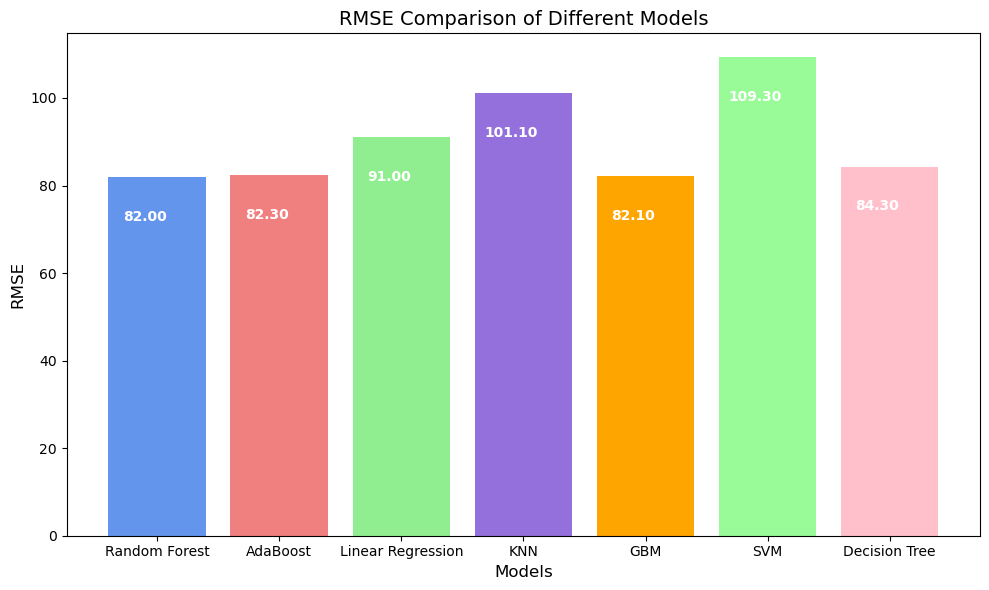

In [43]:
models = ['Random Forest', 'AdaBoost', 'Linear Regression', 'KNN', 'GBM', 'SVM', 'Decision Tree']
rmse_values = [82.0, 82.3, 91.0, 101.1, 82.1, 109.3, 84.3]

colors = ['cornflowerblue', 'lightcoral', 'lightgreen', 'mediumpurple', 'orange', 'palegreen','pink']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, rmse_values, color=colors)

for bar, rmse in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() - 10, '{:.2f}'.format(rmse),
             ha='center', color='white', fontsize=10, fontweight='bold')

plt.xlabel('Models', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('RMSE Comparison of Different Models', fontsize=14)

plt.tight_layout()
plt.show()


Based on these RMSE values, the Gradient Boosting Machines (GBM) model has the lowest RMSE, indicating that it performs the best among the models evaluated. Random Forest and AdaBoost also perform well with similar RMSE values. Linear Regression performs worse than the ensemble models, while KNN and SVM exhibit the highest RMSE values, suggesting poorer performance compared to the other models on this particular dataset.

Simple averaging is a ensemble method that combines predictions from multiple models by calculating their average. In this approach, predictions made by each individual model are combined by taking their arithmetic mean. For example, we have predictions from seven different models (Random Forest, AdaBoost, Linear Regression, KNN, Gradient Boosting, SVM, Decision Tree), we add up their predictions for each sample and divide by the number of models. This produces a single prediction for each sample, which is the average of predictions from all the models. 

Voting or ensemble voting, is a technique used in ensemble learning to combine the predictions of multiple base models to make a final prediction. In voting, each base model independently predicts the target variable, and the final prediction is determined by aggregating the individual predictions through a voting mechanism.
In the examples below, both hard voting and soft voting were implemented.
: Hard voting was used when calculating the y_pred_voting variable. In hard voting, each base model's prediction is treated as a "vote," and the final prediction is determined by the mot) of all the individual predictionsg: Soft voting was implicitly implemented when calculating the y_pred_avg variable. Although not explicitly mentioned, the averaging of predictions from multiple models constitutes soft voting. In soft voting, the final prediction is based on the average probability or confidence scores predicted by the base modems.

Stacking or stacked generalization, is an ensemble learning technique that combines multiple base models to improve predictive performance. Unlike simple averaging or voting, stacking involves training a meta-model on the predictions made by the base models.
Stacking allows the meta-model to learn from the strengths and weaknesses of the base models, potentially leading to improved performance compared to individual base models or simple ensembles.   

In [44]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

base_models = [
    ('rf', RandomForestRegressor(random_state=seed, max_depth=6)),
    ('ada', AdaBoostRegressor(random_state=seed, learning_rate=.0005)),
    ('linear', LinearRegression()),
    ('knn', KNeighborsRegressor(n_neighbors=10)),
    ('gbm', GradientBoostingRegressor(random_state=seed, learning_rate=0.1, n_estimators=100, max_depth=3)),
    ('svm', SVR(kernel='rbf', C=1.0, epsilon=0.1)),
    ('decision_tree', DecisionTreeRegressor(random_state=seed, max_depth=6))
]

rf = RandomForestRegressor(random_state=seed, max_depth=6)
rf.fit(X_train_imputed, y_train)
y_pred_rf = rf.predict(X_test_imputed)

ada = AdaBoostRegressor(random_state=seed, learning_rate=.0005)
ada.fit(X_train_imputed, y_train)
y_pred_ada = ada.predict(X_test_imputed)

linear_reg = LinearRegression()
linear_reg.fit(X_train_imputed, y_train)
y_pred_linear = linear_reg.predict(X_test_imputed)

knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_train_imputed, y_train)
y_pred_knn = knn_reg.predict(X_test_imputed)

gbm_reg = GradientBoostingRegressor(random_state=seed, learning_rate=0.1, n_estimators=100, max_depth=3)
gbm_reg.fit(X_train_imputed, y_train)
y_pred_gbm = gbm_reg.predict(X_test_imputed)

svm_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_reg.fit(X_train_imputed, y_train)
y_pred_svm = svm_reg.predict(X_test_imputed)

decision_tree = DecisionTreeRegressor(random_state=seed, max_depth=6)
decision_tree.fit(X_train_imputed, y_train)
y_pred_decision_tree = decision_tree.predict(X_test_imputed)


# Initialize stacking regressor
stacking_reg = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit stacking regressor
stacking_reg.fit(X_train_imputed, y_train)

# Predictions from stacking
y_pred_stacking = stacking_reg.predict(X_test_imputed)

# Calculate RMSE for each model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
rmse_ada = mean_squared_error(y_test, y_pred_ada, squared=False)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
rmse_gbm = mean_squared_error(y_test, y_pred_gbm, squared=False)
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)
rmse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree, squared=False)
rmse_stacking = mean_squared_error(y_test, y_pred_stacking, squared=False)

# Simple Averaging
y_pred_avg = (y_pred_rf + y_pred_ada + y_pred_linear + y_pred_knn + y_pred_gbm + y_pred_svm + y_pred_decision_tree) / 7
rmse_avg = mean_squared_error(y_test, y_pred_avg, squared=False)
print("RMSE (Simple Averaging):", rmse_avg)

# Voting
y_pred_voting = np.round((y_pred_rf + y_pred_ada + y_pred_linear + y_pred_knn + y_pred_gbm + y_pred_svm + y_pred_decision_tree) / 7)
rmse_voting = mean_squared_error(y_test, y_pred_voting, squared=False)
print("RMSE (Voting):", rmse_voting)

# Stacking
print("RMSE (Stacking):", rmse_stacking)


RMSE (Simple Averaging): 84.7147675874648
RMSE (Voting): 84.71667480792865
RMSE (Stacking): 82.05309932583498


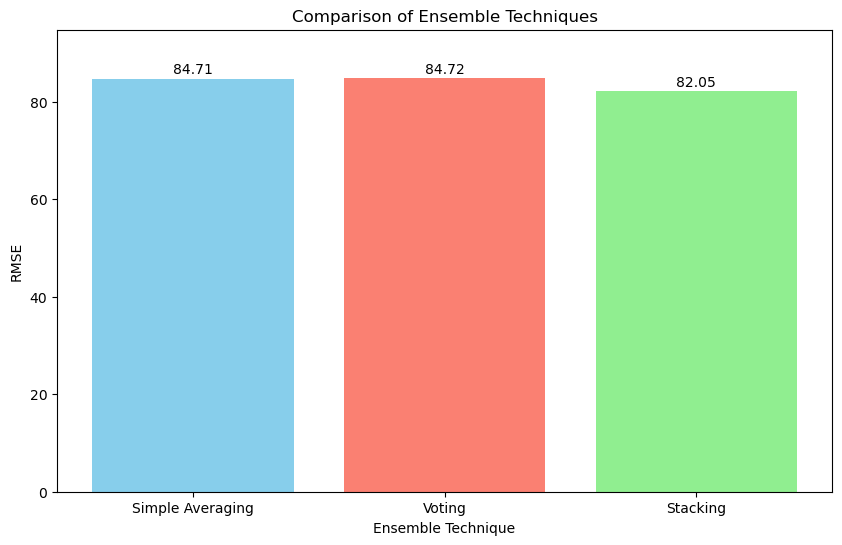

In [45]:
import matplotlib.pyplot as plt

rmse_values = [rmse_avg, rmse_voting, rmse_stacking]
techniques = ['Simple Averaging', 'Voting', 'Stacking']
plt.figure(figsize=(10, 6))
bars = plt.bar(techniques, rmse_values, color=['skyblue', 'salmon', 'lightgreen'])
for bar, rmse_value in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{rmse_value:.2f}', ha='center', va='bottom')

plt.xlabel('Ensemble Technique')
plt.ylabel('RMSE')
plt.title('Comparison of Ensemble Techniques')
plt.ylim(0, max(rmse_values) + 10) 
plt.show()
